In [1]:
import pandas as pd
import numpy as np
import scipy.stats
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn_pandas import DataFrameMapper
from sklearn.preprocessing import LabelEncoder
# get rid of warnings
import warnings
warnings.filterwarnings("ignore")
# get more than one output per Jupyter cell
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
# for functions we implement later
from utils import best_fit_distribution
from utils import plot_result

In [2]:
df = pd.read_csv("titanic_train.csv")

In [3]:
df.shape
df.head()

(891, 12)

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

In [4]:
df.drop(columns=["PassengerId", "Name"], inplace=True) # dropped because unique for every row
df.drop(columns=["Ticket", "Cabin"], inplace=True) # dropped because almost unique for every row
df.dropna(inplace=True)

In [5]:
df.shape
df.head()

(712, 8)

Survived  Pclass     Sex   Age  SibSp  Parch     Fare Embarked
0         0       3    male  22.0      1      0   7.2500        S
1         1       1  female  38.0      1      0  71.2833        C
2         1       3  female  26.0      0      0   7.9250        S
3         1       1  female  35.0      1      0  53.1000        S
4         0       3    male  35.0      0      0   8.0500        S

In [6]:
encoders = [(["Sex"], LabelEncoder()), (["Embarked"], LabelEncoder())]
mapper = DataFrameMapper(encoders, df_out=True)
new_cols = mapper.fit_transform(df.copy())
df = pd.concat([df.drop(columns=["Sex", "Embarked"]), new_cols], axis="columns")

c:\users\semic\appdata\local\programs\python\python36-32\lib\site-packages\sklearn\preprocessing\label.py:95: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\semic\appdata\local\programs\python\python36-32\lib\site-packages\sklearn\preprocessing\label.py:95: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\semic\appdata\local\programs\python\python36-32\lib\site-packages\sklearn\preprocessing\label.py:128: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\semic\appdata\local\programs\python\python36-32\lib\site-packages\sklearn\preprocessing\label

In [7]:
df.shape
df.head()

(712, 8)

Survived  Pclass   Age  SibSp  Parch     Fare  Sex  Embarked
0         0       3  22.0      1      0   7.2500    1         2
1         1       1  38.0      1      0  71.2833    0         0
2         1       3  26.0      0      0   7.9250    0         2
3         1       1  35.0      1      0  53.1000    0         2
4         0       3  35.0      0      0   8.0500    1         2

In [8]:
df.nunique()

Survived      2
Pclass        3
Age          88
SibSp         6
Parch         7
Fare        219
Sex           2
Embarked      3
dtype: int64

In [9]:
categorical = []
continuous = []

In [10]:
for c in list(df):
    col = df[c]
    nunique = col.nunique()
    if nunique < 20:
        categorical.append(c)
    else:
        continuous.append(c)

In [11]:
categorical

['Survived', 'Pclass', 'SibSp', 'Parch', 'Sex', 'Embarked']

In [12]:
continuous

['Age', 'Fare']

In [13]:
for c in categorical:
    counts = df[c].value_counts()
    np.random.choice(list(counts.index), p=(counts/len(df)).values, size=5)

array([1, 1, 0, 1, 1])

array([3, 3, 3, 1, 1])

array([0, 1, 0, 0, 0])

array([0, 0, 0, 0, 0])

array([0, 1, 0, 0, 1])

array([0, 1, 2, 2, 0])

In [14]:
# https://stackoverflow.com/a/37616966/1820480

In [15]:
best_distributions = []

In [16]:
# for c in continuous:
#     data = df[c]
#     best_fit_name, best_fit_params = best_fit_distribution(data, 50)
#     best_distributions.append((best_fit_name, best_fit_params))

In [17]:
best_distributions

[]

In [18]:
best_distributions = [
    ('fisk', (11.744665309421649, -66.15529969956657, 94.73575225186589)),
    ('halfcauchy', (-5.537941926133496e-09, 17.86796415175786))]

c:\users\semic\appdata\local\programs\python\python36-32\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


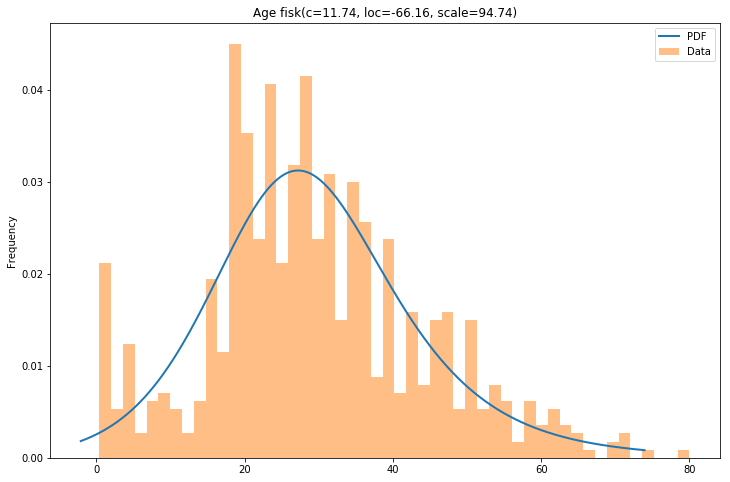

c:\users\semic\appdata\local\programs\python\python36-32\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


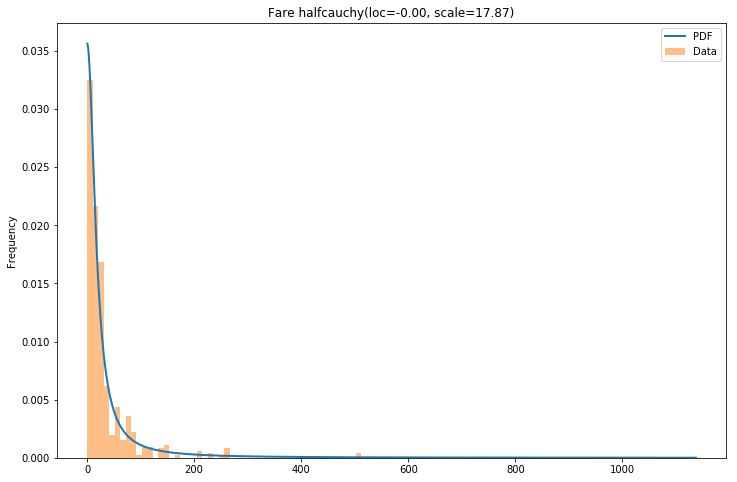

In [19]:
plot_result(df, continuous, best_distributions)

In [20]:
def generate_like_df(df, categorical_cols, continuous_cols, best_distributions, n, seed=0):
    np.random.seed(seed)
    d = {}
    
    for c in categorical_cols:
        counts = df[c].value_counts()
        d[c] = np.random.choice(list(counts.index), p=(counts/len(df)).values, size=n)
    
    for c, bd in zip(continuous_cols, best_distributions):
        dist = getattr(scipy.stats, bd[0])
        d[c] = dist.rvs(size=n, *bd[1])
    
    return pd.DataFrame(d, columns=categorical_cols+continuous_cols)

In [21]:
gendf = generate_like_df(df, categorical, continuous, best_distributions, n=100)

In [22]:
gendf.shape
gendf.head()

(100, 8)

Survived  Pclass  SibSp  Parch  Sex  Embarked        Age       Fare
0         0       1      0      2    1         2  16.846655  11.866699
1         1       3      1      1    0         2  22.967661   6.523808
2         1       1      0      0    1         2  34.873726   2.272420
3         0       2      0      0    0         2   9.149005   2.408852
4         0       3      0      0    0         2  32.161475   6.477172

In [23]:
gendf.columns = list(range(gendf.shape[1]))

In [24]:
gendf.to_csv("output.csv", index_label="id")

In [25]:
gendf.shape
gendf.head()

(100, 8)

0  1  2  3  4  5          6          7
0  0  1  0  2  1  2  16.846655  11.866699
1  1  3  1  1  0  2  22.967661   6.523808
2  1  1  0  0  1  2  34.873726   2.272420
3  0  2  0  0  0  2   9.149005   2.408852
4  0  3  0  0  0  2  32.161475   6.477172